# Soft Margin SVM


We allow some misclassifications because of outliers, and we add a penalty for the misclassifications.  
Following atached resources will help understand the math behind Soft-margin SVM :
- [Video : Soft Margin SVM](https://youtu.be/IjSfa7Q8ngs?si=Kat1jMRHp_HvGzlJ) by ritvikmath

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
from scipy import optimize
%matplotlib inline

In [2]:
# Changed Dataset for soft margin SVM

X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1,
              1, 1])

In [3]:
d, n = X.shape

# Diagonal Y matrix:
Y = np.diag(y)

# Q matrix
Q = Y.T @ X.T @ X @ Y

# f(alpha) function
f = lambda alpha: 0.5 * alpha.T @ Q @ alpha - alpha.sum()

Now we introduce a hyperparameter $C$, that will act as an upper bound for $\alpha$ and control the amount of misclassifications.

In [4]:
# optimization
def optimization(f,C):
    alpha_init = np.zeros(n)
    res = optimize.minimize(f, alpha_init, bounds = optimize.Bounds(0, C))
    return res.x

In [5]:
# Weight vector
def weight(alpha_star):
    w_star = X @ Y @ alpha_star
    return w_star

In [6]:
def sup_col(X,y,alpha_star):
    X_sup = X[:, alpha_star > 0]
    y_sup = y[alpha_star > 0]
    y_sup_color = np.where(y_sup == 1, 'green', 'red')
    return X_sup,y_sup,y_sup_color

We will use the plot function from the previous SVM notebook with little changes:

In [7]:
def plot_db(w):
    y_color = np.where(y == 1, 'green', 'red')
    plt.scatter(X[0, :], X[1, :], c = y_color, alpha = 0.3) # plot of original data points, transparency 0.3
    plt.scatter(X_sup[0, :], X_sup[1, :], c = y_sup_color) # plot of support vector
    plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5) # horizontal dash line
    plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5) # vertical dash line
    
    x_db = np.linspace(-4, 4)
    y_db = -w[0] / w[1] * x_db
    
    # decision boundary
    plt.plot(x_db, y_db, color = 'black')
    
    # supporting hyperplanes
    y_sup_1 = 1 / w[1] - w[0] / w[1] * x_db
    y_sup_2 = -1 / w[1] - w[0] / w[1] * x_db
    
    plt.plot(x_db, y_sup_1, color = 'gray', linestyle = '--')
    plt.plot(x_db, y_sup_2, color = 'gray', linestyle = '--')
    #plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3) # weight vector
    #plt.xlim(-10, 10)
    #plt.ylim(-10, 10)
    plt.title(f'C = {C}')

C = 0.01, margin = 4.503773491110451
C = 0.1, margin = 1.4680505633565106
C = 1, margin = 0.5146504438131713
C = 10, margin = 0.3162258119836371


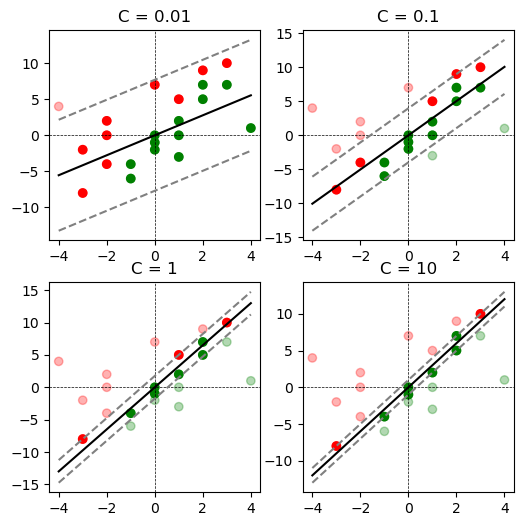

In [8]:
count = 1
for C in [0.01, 0.1, 1, 10]:
    alpha_star = optimization(f,C)
    w_star = weight(alpha_star)
    X_sup,y_sup,y_sup_color = sup_col(X,y,alpha_star)
    print(f'C = {C}, margin = {1 / np.linalg.norm(w_star)}')
    plt.subplot(2, 2, count)
    plot_db(w_star)
    count += 1

plt.show()